Belt Exam: **Intermediate ML**

Student Name: **Victoria Katusabe**


**Part 1: Clustering instructions:**

An online school would like to segment its students into groups to see how different kinds of students differ. They have asked you to do this and report on how the groups are different and any important insights about the kinds of students that come from this clustering.

1.**Load this dataset for modeling**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
filename = '/content/drive/MyDrive/Colab data uploads/Option_B_clustering - Option_B_clustering.csv'
df = pd.read_csv(filename)
df.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


In [ ]:
unique_values = df['passed_course'].unique()
unique_values

array([1, 0])

**2. Explore the data and clean it as needed**

In [ ]:
# Checking the data types
df.dtypes

gender                  int64
highest_education       int64
imd_band                int64
age_band                int64
num_of_prev_attempts    int64
studied_credits         int64
disability              int64
passed_course           int64
assess_score_1          int64
assess_score_2          int64
assess_score_3          int64
assess_score_4          int64
assess_score_5          int64
dtype: object

In [ ]:
# Checking the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


In [ ]:
# Check for missing values
df.isna().sum()

gender                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
passed_course           0
assess_score_1          0
assess_score_2          0
assess_score_3          0
assess_score_4          0
assess_score_5          0
dtype: int64

In [ ]:
# Print the summary statistics of the data
df.describe()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
count,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000
mean,0.446651,2.089896,4.407788,0.339169,0.107404,74.758577,0.091858,0.763131,73.988773,74.916935,79.734474,75.672686,78.116589
std,0.497165,0.940941,2.806466,0.488947,0.389791,37.461960,0.288837,0.425178,19.162201,14.650798,17.650248,17.969746,19.530364
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000,66.000000,66.000000,69.000000,65.000000,67.000000
50%,0.000000,2.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000,77.000000,76.000000,81.000000,79.000000,80.000000
75%,1.000000,3.000000,7.000000,1.000000,0.000000,90.000000,0.000000,1.000000,86.000000,86.000000,95.000000,89.000000,96.000000
max,1.000000,4.000000,9.000000,2.000000,6.000000,630.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

7

In [ ]:
# Drop duplicate rows in df
df.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

0

**3. Prepare the data for modeling**

In [ ]:
# Import the StandardScaler module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df)

# Transform the data using the scaler
df_scaled = scaler.transform(df)

**4. Use a KMeans model to cluster the students into an optimal number of clusters.**

    1. Use an elbow plot and silhouette score to find the optimal number of clusters.
    2. There must be between 2 and 10 clusters.
    3. Explain your choice of the number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

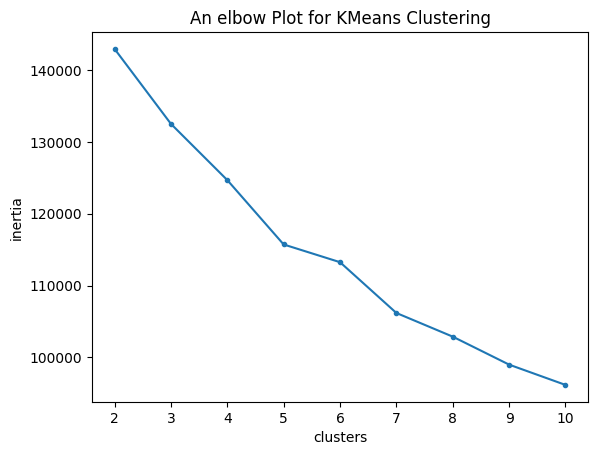

In [ ]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.title("An elbow Plot for KMeans Clustering")
plt.ylabel('inertia');


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

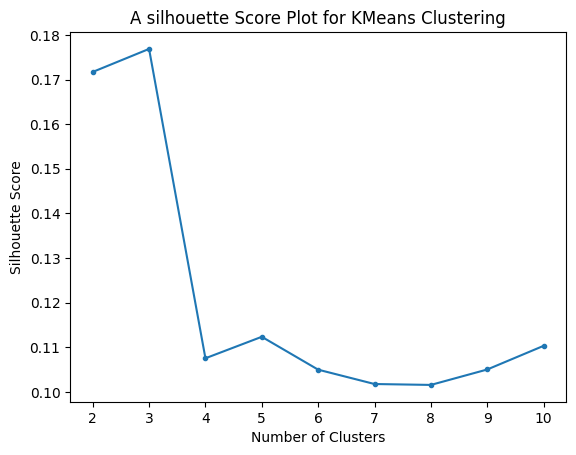

In [ ]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.title("A silhouette Score Plot for KMeans Clustering")
plt.ylabel('Silhouette Score');

**Visualization interpretation**

**Based on the Elbow and silhouette score plot above, the following are happening**

1. the optimal number of clusters is 3. This is the point where the silhouette score starts to level off, indicating that adding more clusters will not significantly improve on the quality of the clustering.

2. the silhouette score increases rapidly as the number of clusters increases from 2 to 3. This indicates that adding more clusters is improving the quality of the clustering. However, the silhouette score starts to level off after 3 clusters. This indicates that adding more clusters will not significantly improve the quality of the clustering

3. Therefore, the optimal number of clusters is 3.

**5.Analyze and report on the clusters.**

    1. Create 2 report quality explanatory visualizations showing important differences between the clusters.
    2. Interpret and explain each visualization.

In [ ]:
# Choose the optimal number of clusters (based on elbow plot and silhouette score)
optimal_clusters = 5

# Fit the KMeans model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Group by cluster to get the mean values
cluster_description = df.groupby('Cluster').mean()
cluster_description

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
Cluster,,,,,,,,,,,,,
0,0.367065,1.990800,3.920883,0.284269,0.092916,76.678933,1.000000,0.722171,73.543698,73.873965,78.228151,76.106716,78.091076
1,0.392179,1.988827,4.233520,0.311732,1.300559,102.871508,0.034637,0.699441,74.964246,73.329609,82.901676,73.526257,79.788827
2,0.000000,2.115017,4.410590,0.376302,0.000000,68.101128,0.000000,0.886502,76.078993,76.444010,86.120660,81.282552,86.078125
3,0.521306,1.980088,3.988849,0.268021,0.038630,77.823576,0.020709,0.403823,58.853047,61.348068,61.281959,56.266826,56.598566
4,1.000000,2.189308,4.880408,0.364563,0.001653,73.635988,0.000000,0.882612,81.694957,83.064481,84.062827,82.338110,82.454671


In [ ]:
df.dtypes

gender                  int64
highest_education       int64
imd_band                int64
age_band                int64
num_of_prev_attempts    int64
studied_credits         int64
disability              int64
passed_course           int64
assess_score_1          int64
assess_score_2          int64
assess_score_3          int64
assess_score_4          int64
assess_score_5          int64
Cluster                 int32
dtype: object

Index(['gender', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability',
       'passed_course', 'assess_score_1', 'assess_score_2', 'assess_score_3',
       'assess_score_4', 'assess_score_5', 'Cluster'],
      dtype='object')


<ipython-input-147-4b769c25fda2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Cluster', y='passed_course', palette='Set1', ci=None)
<ipython-input-147-4b769c25fda2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='passed_course', palette='Set1', ci=None)


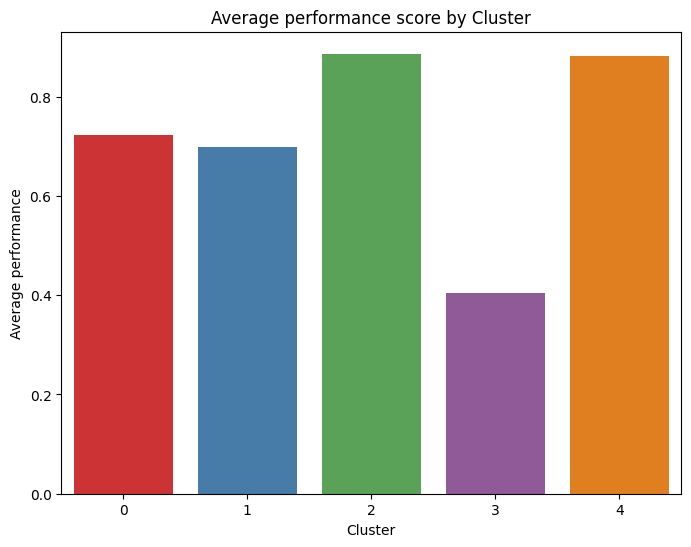

In [ ]:
print(df.columns)

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Cluster', y='passed_course', palette='Set1', ci=None)
plt.title('Average performance score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average performance')
plt.show()

**Interpretation**

1. from the bar plot above to its shows that cluster 2 and 4 have the highest performance score.

2. cluster 0 and 1 the relatively high performance score than cluster 3

3. Cluster 3 has the lowest performance score of all.


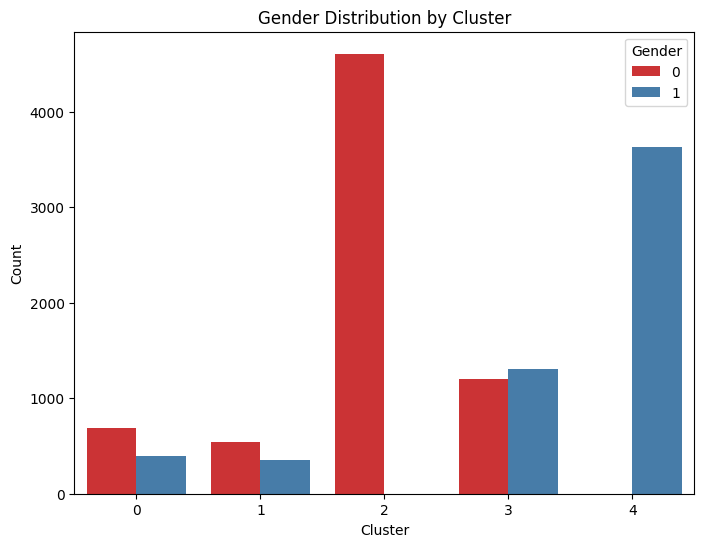

In [ ]:
# A bar plot of gender against cluster.
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Cluster', hue='gender', palette='Set1')
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

**Interpretation**

from the graph above, its shows that hight gender distribution above the other
and Cluster 1 has the lowest gender distribution

**Part 2: Modeling Instructions:**

**Load this dataset for modeling **

In [ ]:
#Loading data frame 2
filename = '/content/drive/MyDrive/Colab data uploads/Option_B_modeling.csv'
df2 = pd.read_csv(filename)
df2.head()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Check the data frame info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Columns: 931 entries, gender to presentation_2014J
dtypes: float64(910), int64(21)
memory usage: 90.5 MB


In [ ]:
# Checking data types
df2.dtypes

gender                  int64
highest_education       int64
imd_band                int64
age_band                int64
num_of_prev_attempts    int64
                        ...  
presentation_0          int64
presentation_2013B      int64
presentation_2013J      int64
presentation_2014B      int64
presentation_2014J      int64
Length: 931, dtype: object

In [ ]:
# Checking for missing values
df2.isna().sum()

gender                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
                       ..
presentation_0          0
presentation_2013B      0
presentation_2013J      0
presentation_2014B      0
presentation_2014J      0
Length: 931, dtype: int64

In [ ]:
# Print the summary statistics of the data
df2.describe()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
count,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,...,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000
mean,0.446651,2.089896,4.407788,0.339169,0.107404,74.758577,0.091858,0.763131,73.988773,74.916935,...,0.136610,0.159457,0.000471,0.225799,0.129701,0.000471,0.190783,0.276046,0.225799,0.306901
std,0.497165,0.940941,2.806466,0.488947,0.389791,37.461960,0.288837,0.425178,19.162201,14.650798,...,0.343449,0.366116,0.021700,0.418124,0.335987,0.021700,0.392934,0.447057,0.418124,0.461226
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000,66.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000,77.000000,76.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,7.000000,1.000000,0.000000,90.000000,0.000000,1.000000,86.000000,86.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,4.000000,9.000000,2.000000,6.000000,630.000000,1.000000,1.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check for duplicate rows
df2.duplicated().sum()

0

In [ ]:
#define x, y
X = df2.drop(columns=['passed_course'])
y = df2['passed_course']

**Scale the Data**

In [ ]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(12737, 930)

In [ ]:
y.shape

(12737,)

In [ ]:
#train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Use PCA to prepare the data for modeling.**

In [ ]:
# Instantiate PCA with desired number of components
pca = PCA(n_components=50)
# Fit and transform the data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the shape of the reduced data
print(X_train_pca.shape)
print(X_test_pca.shape)

(10189, 50)
(2548, 50)


In [ ]:
import tensorflow as tf

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
# Train the model
history1 = model.fit(X_train_pca, y_train, epochs=50, validation_split=0.2, batch_size=32)


Epoch 1/50
255/255 [==============================] - 3s 5ms/step - loss: 0.4019 - mae: 0.4444 - val_loss: 0.2377 - val_mae: 0.3734
Epoch 2/50
255/255 [==============================] - 1s 5ms/step - loss: 0.2480 - mae: 0.3407 - val_loss: 0.1896 - val_mae: 0.3244
Epoch 3/50
255/255 [==============================] - 1s 4ms/step - loss: 0.2448 - mae: 0.3182 - val_loss: 0.1677 - val_mae: 0.3118
Epoch 4/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1704 - mae: 0.2836 - val_loss: 0.1564 - val_mae: 0.2940
Epoch 5/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1293 - mae: 0.2618 - val_loss: 0.1384 - val_mae: 0.2904
Epoch 6/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1159 - mae: 0.2458 - val_loss: 0.1379 - val_mae: 0.2753
Epoch 7/50
255/255 [==============================] - 1s 3ms/step - loss: 0.1096 - mae: 0.2384 - val_loss: 0.1287 - val_mae: 0.2725
Epoch 8/50
255/255 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test_pca, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model.predict(X_test_pca)

80/80 [==============================] - 0s 3ms/step - loss: 0.1286 - mae: 0.2452
Test loss: 0.1286436915397644
Test MAE: 0.24515582621097565
80/80 [==============================] - 0s 2ms/step


**Model1 has  only one hidden layer and no regularization.**

In [ ]:
# Import the layers module from tensorflow.keras
from tensorflow.keras import layers

# Define the model
model1 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history1 = model1.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss1, mae1 = model1.evaluate(X_test_pca, y_test)

Epoch 1/64
255/255 [==============================] - 2s 6ms/step - loss: 1.5173 - mae: 0.7690 - val_loss: 0.6430 - val_mae: 0.5730
Epoch 2/64
255/255 [==============================] - 1s 3ms/step - loss: 0.5421 - mae: 0.5190 - val_loss: 0.4908 - val_mae: 0.5045
Epoch 3/64
255/255 [==============================] - 1s 3ms/step - loss: 0.3592 - mae: 0.4457 - val_loss: 0.3727 - val_mae: 0.4449
Epoch 4/64
255/255 [==============================] - 1s 3ms/step - loss: 0.2791 - mae: 0.3996 - val_loss: 0.3398 - val_mae: 0.4254
Epoch 5/64
255/255 [==============================] - 1s 2ms/step - loss: 0.2605 - mae: 0.3756 - val_loss: 0.2636 - val_mae: 0.3826
Epoch 6/64
255/255 [==============================] - 1s 3ms/step - loss: 0.2262 - mae: 0.3500 - val_loss: 0.2406 - val_mae: 0.3724
Epoch 7/64
255/255 [==============================] - 1s 3ms/step - loss: 0.1867 - mae: 0.3295 - val_loss: 0.2153 - val_mae: 0.3547
Epoch 8/64
255/255 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
# Evaluate the model
loss, mae = model1.evaluate(X_test_pca, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model.predict(X_test_pca)

80/80 [==============================] - 0s 2ms/step - loss: 0.1140 - mae: 0.2368
Test loss: 0.11400773376226425
Test MAE: 0.23678824305534363
80/80 [==============================] - 0s 3ms/step


In [ ]:
model2 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history2 = model2.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss2, mae2 = model2.evaluate(X_test_pca, y_test)

Epoch 1/64
255/255 [==============================] - 3s 4ms/step - loss: 0.6060 - mae: 0.5747 - val_loss: 0.2929 - val_mae: 0.3965
Epoch 2/64
255/255 [==============================] - 1s 4ms/step - loss: 0.2064 - mae: 0.3553 - val_loss: 0.1906 - val_mae: 0.3287
Epoch 3/64
255/255 [==============================] - 1s 3ms/step - loss: 0.1554 - mae: 0.3048 - val_loss: 0.1649 - val_mae: 0.3063
Epoch 4/64
255/255 [==============================] - 1s 3ms/step - loss: 0.1359 - mae: 0.2837 - val_loss: 0.1489 - val_mae: 0.2874
Epoch 5/64
255/255 [==============================] - 1s 3ms/step - loss: 0.1263 - mae: 0.2688 - val_loss: 0.1389 - val_mae: 0.2733
Epoch 6/64
255/255 [==============================] - 1s 3ms/step - loss: 0.1178 - mae: 0.2561 - val_loss: 0.1334 - val_mae: 0.2740
Epoch 7/64
255/255 [==============================] - 1s 3ms/step - loss: 0.1134 - mae: 0.2496 - val_loss: 0.1307 - val_mae: 0.2660
Epoch 8/64
255/255 [==============================] - 1s 4ms/step - loss: 0.

In [ ]:
# Evaluate the model
loss, mae = model2.evaluate(X_test_pca, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model2.predict(X_test_pca)

80/80 [==============================] - 0s 2ms/step - loss: 0.1113 - mae: 0.2212
Test loss: 0.11129257827997208
Test MAE: 0.22115597128868103
80/80 [==============================] - 0s 2ms/step


In [ ]:
model3 = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(X_train_pca.shape[1],)),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dense(1)
])

model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history3 = model3.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss3, mae3 = model3.evaluate(X_test_pca, y_test)

Epoch 1/64
255/255 [==============================] - 2s 4ms/step - loss: 1.5799 - mae: 0.5944 - val_loss: 1.1158 - val_mae: 0.3990
Epoch 2/64
255/255 [==============================] - 1s 3ms/step - loss: 0.9627 - mae: 0.3497 - val_loss: 0.8642 - val_mae: 0.3259
Epoch 3/64
255/255 [==============================] - 1s 3ms/step - loss: 0.7545 - mae: 0.2987 - val_loss: 0.6789 - val_mae: 0.2912
Epoch 4/64
255/255 [==============================] - 1s 3ms/step - loss: 0.5927 - mae: 0.2708 - val_loss: 0.5349 - val_mae: 0.2806
Epoch 5/64
255/255 [==============================] - 2s 6ms/step - loss: 0.4615 - mae: 0.2551 - val_loss: 0.4201 - val_mae: 0.2702
Epoch 6/64
255/255 [==============================] - 2s 6ms/step - loss: 0.3590 - mae: 0.2456 - val_loss: 0.3363 - val_mae: 0.2613
Epoch 7/64
255/255 [==============================] - 2s 6ms/step - loss: 0.2841 - mae: 0.2397 - val_loss: 0.2661 - val_mae: 0.2414
Epoch 8/64
255/255 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
# Evaluate the model
loss, mae = model3.evaluate(X_test_pca, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model3.predict(X_test_pca)

80/80 [==============================] - 0s 2ms/step - loss: 0.1092 - mae: 0.2171
Test loss: 0.10924078524112701
Test MAE: 0.21710851788520813
80/80 [==============================] - 0s 2ms/step


In [ ]:
history1 = model1.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss1, mae1 = model1.evaluate(X_test_pca, y_test)

history2 = model2.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss2, mae2 = model2.evaluate(X_test_pca, y_test)

history3 = model3.fit(X_train_pca, y_train, epochs=64, validation_split=0.2, batch_size=32)
loss3, mae3 = model3.evaluate(X_test_pca, y_test)

Epoch 1/64
255/255 [==============================] - 1s 3ms/step - loss: 0.0885 - mae: 0.2145 - val_loss: 0.1349 - val_mae: 0.2494
Epoch 2/64
255/255 [==============================] - 1s 3ms/step - loss: 0.0841 - mae: 0.2090 - val_loss: 0.1394 - val_mae: 0.2582
Epoch 3/64
255/255 [==============================] - 1s 3ms/step - loss: 0.0829 - mae: 0.2074 - val_loss: 0.1494 - val_mae: 0.2623
Epoch 4/64
255/255 [==============================] - 1s 3ms/step - loss: 0.0831 - mae: 0.2083 - val_loss: 0.1406 - val_mae: 0.2633
Epoch 5/64
255/255 [==============================] - 1s 3ms/step - loss: 0.0856 - mae: 0.2118 - val_loss: 0.1488 - val_mae: 0.2716
Epoch 6/64
255/255 [==============================] - 1s 3ms/step - loss: 0.0868 - mae: 0.2122 - val_loss: 0.1340 - val_mae: 0.2546
Epoch 7/64
255/255 [==============================] - 1s 3ms/step - loss: 0.0870 - mae: 0.2101 - val_loss: 0.1405 - val_mae: 0.2565
Epoch 8/64
255/255 [==============================] - 1s 4ms/step - loss: 0.

**Choose a final model and justify your choice**

In [ ]:
# Evaluate the model
loss, mae = model1.evaluate(X_test_pca, y_test)
print('Model 1 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model1.predict(X_test_pca)

80/80 [==============================] - 0s 2ms/step - loss: 0.1188 - mae: 0.2497
Model 1 results:
Test loss: 0.11877390742301941
Test MAE: 0.24971750378608704
80/80 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate the model
loss, mae = model2.evaluate(X_test_pca, y_test)
print('Model 2 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model2.predict(X_test_pca)

80/80 [==============================] - 0s 3ms/step - loss: 0.1063 - mae: 0.2158
Model 2 results:
Test loss: 0.10632345825433731
Test MAE: 0.2157903015613556
80/80 [==============================] - 0s 3ms/step


In [ ]:
# Evaluate the model
loss, mae = model3.evaluate(X_test_pca, y_test)
print('Model 3 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions = model3.predict(X_test_pca)

80/80 [==============================] - 0s 3ms/step - loss: 0.1087 - mae: 0.2168
Model 3 results:
Test loss: 0.10869313031435013
Test MAE: 0.2167980670928955
80/80 [==============================] - 0s 3ms/step


In [ ]:
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),

    }

    return metrics

# Evaluate each model
metrics1 = evaluate_model(model1, X_train_pca, y_train, X_test_pca, y_test)
metrics2 = evaluate_model(model2, X_train_pca, y_train, X_test_pca, y_test)
metrics3 = evaluate_model(model3, X_train_pca, y_train, X_test_pca, y_test)

print('Model 1 Metrics:', metrics1)
print('Model 2 Metrics:', metrics2)
print('Model 3 Metrics:', metrics3)

80/80 [==============================] - 0s 2ms/step
Model 1 Metrics: {'Train MAE': 0.21052625787329518, 'Test MAE': 0.24971750867516504, 'Train MSE': 0.09296803929582441, 'Test MSE': 0.11877390106083294, 'Train R2': 0.48384671783027267, 'Test R2': 0.352064114173414}
Model 2 Metrics: {'Train MAE': 0.16661998063811423, 'Test MAE': 0.2157903326122643, 'Train MSE': 0.06494964312831418, 'Test MSE': 0.1063234529070928, 'Train R2': 0.6394032644943869, 'Test R2': 0.4199838514337052}
Model 3 Metrics: {'Train MAE': 0.20450122203995616, 'Test MAE': 0.21679807368379372, 'Train MSE': 0.087870547304832, 'Test MSE': 0.09964576648270457, 'Train R2': 0.51214770429738, 'Test R2': 0.45641199456964654}


:** looking the model results of the above three models, I choose MODEL2 looking its  **Test Loss,
**Test MAE**  and **Rsquared value** being lower than that of MODEL1 and MODEL3 **

Evaluate your final model with multiple metrics

In [ ]:
# Function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
       'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),

    }

    return metrics

# Evaluate  model1
metrics1 = evaluate_model(model1, X_train_pca, y_train, X_test_pca, y_test)

print('Model 1 Metrics:', metrics1)

80/80 [==============================] - 0s 2ms/step
Model 1 Metrics: {'Train MAE': 0.21052625787329518, 'Test MAE': 0.24971750867516504, 'Train MSE': 0.09296803929582441, 'Test MSE': 0.11877390106083294, 'Train R2': 0.48384671783027267, 'Test R2': 0.352064114173414}


In [ ]:
# Evaluate the model
loss, mae = model1.evaluate(X_test_pca, y_test)
print('Model 1 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions_model1 = model1.predict(X_test_pca)

# Evaluate the model
loss, mae = model2.evaluate(X_test_pca, y_test)
print('Model 2 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions_model2 = model2.predict(X_test_pca)

# Evaluate the model
loss, mae = model3.evaluate(X_test_pca, y_test)
print('Model 3 results:')
print('Test loss:', loss)
print('Test MAE:', mae)

# Make predictions
predictions_model3 = model3.predict(X_test_pca)

80/80 [==============================] - 0s 2ms/step - loss: 0.1188 - mae: 0.2497
Model 1 results:
Test loss: 0.11877390742301941
Test MAE: 0.24971750378608704
80/80 [==============================] - 0s 2ms/step - loss: 0.1063 - mae: 0.2158
Model 2 results:
Test loss: 0.10632345825433731
Test MAE: 0.2157903015613556
80/80 [==============================] - 0s 2ms/step - loss: 0.1087 - mae: 0.2168
Model 3 results:
Test loss: 0.10869313031435013
Test MAE: 0.2167980670928955
80/80 [==============================] - 0s 2ms/step
